# Check and Evaluate the Recordings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, reduction
import os.path

%load_ext autoreload
%autoreload 2
%matplotlib inline

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

## General Settings

In [97]:
dataroot = '/home/berlukas/Documents/workspace/darpa/src/darpa_subt_mapping/fgsp/data/'
datasets = ['anymal_1_1628241893122899968/data/']

n_datasets = len(datasets)
opt_signals = []
est_signals = []
opt_trajectory = []
est_trajectory = []
est_raw_trajectory = []
opt_graph_coords = []
opt_graph_adj = []
est_graph_coords = []
est_graph_adj = []
features = []
for ds in datasets:
    ds_path = dataroot + ds 
    print(f'Loading data from {ds_path}')
    opt_signal_path = ds_path + 'opt_signal.npy'
    opt_traj_path = ds_path + 'opt_trajectory.npy'
    est_signal_path = ds_path + 'est_signal.npy'
    est_traj_path = ds_path + 'est_trajectory.npy'  
    est_raw_traj_path = ds_path + 'est_raw_trajectory.npy'  
    opt_graph_coords_path = ds_path + 'opt_graph_coords.npy'
    opt_graph_adj_path = ds_path + 'opt_graph_adj.npy'
    est_graph_coords_path = ds_path + 'est_graph_coords.npy'
    est_graph_adj_path = ds_path + 'est_graph_adj.npy'
    features_path = ds_path + 'features.npy'
 
    if os.path.isfile(opt_signal_path) and os.path.isfile(est_signal_path):
        opt_signals.append(np.load(opt_signal_path))
        est_signals.append(np.load(est_signal_path))
    else:
        print(f'Signal files are not available:')
        print(f'Opt file: {opt_signal_path}')
        print(f'Est file: {est_signal_path}')
        
    if os.path.isfile(opt_traj_path) and os.path.isfile(est_traj_path) and os.path.isfile(est_raw_traj_path):
        opt_trajectory.append(np.load(opt_traj_path))
        est_trajectory.append(np.load(est_traj_path))
        est_raw_trajectory.append(np.load(est_raw_traj_path))
    else:
        print(f'Trajectory files are not available.')
        print(f'Opt file: {opt_traj_path}')
        print(f'Est file: {est_traj_path}')
        print(f'Est raw file: {est_raw_traj_path}')
    
    if os.path.isfile(opt_graph_coords_path) and os.path.isfile(opt_graph_adj_path):
        opt_graph_coords.append(np.load(opt_graph_coords_path))
        opt_graph_adj.append(np.load(opt_graph_adj_path))
    else:
        print(f'Opt Graph files are not available.')
        print(f'Coords file: {opt_graph_coords_path}')
        print(f'Adj file: {opt_graph_adj_path}')
        
    if os.path.isfile(est_graph_coords_path) and os.path.isfile(est_graph_adj_path):
        est_graph_coords.append(np.load(est_graph_coords_path))
        est_graph_adj.append(np.load(est_graph_adj_path, allow_pickle=True))
    else:
        print(f'Est Graph files are not available.')
        print(f'Coords file: {est_graph_coords_path}')
        print(f'Adj file: {est_graph_adj_path}')
        
    if os.path.isfile(features_path):
        features.append(np.load(features_path))
    else:
        print(f'Features are not available: {features_path}')
print(f'=======================================')

Loading data from /home/berlukas/Documents/workspace/darpa/src/darpa_subt_mapping/fgsp/data/anymal_1_1628241893122899968/data/


## Evaluate Signals

In [47]:
def compare_signals(signal_1, signal_2):
    plt.plot(signal_1, label='Signal 1')
    plt.plot(signal_2, label='Signal 2')
    plt.legend()
    plt.show()

i = 0
compare_signals(est_signals[i], opt_signals[i])
print(f'Signal shapes are {est_signals[i].shape} and {opt_signals[i].shape}')

IndexError: list index out of range

## Evaluate Trajectories

Synced signal shapes are (182, 8) and (182, 8)


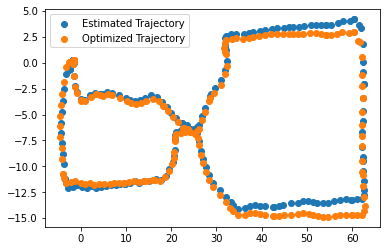

Raw est shape is (3301, 8)


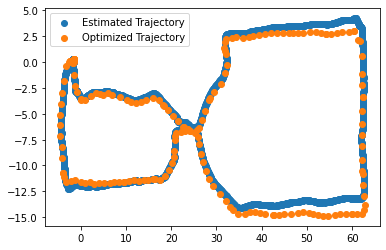

In [34]:
def compare_trajectories(est_traj, opt_traj):    
    plt.scatter(est_traj[:,1], est_traj[:,2], label='Estimated Trajectory')
    plt.scatter(opt_traj[:,1], opt_traj[:,2], label='Optimized Trajectory')
    plt.legend()
    plt.show()
    
i = 0
print(f'Synced signal shapes are {est_trajectory[i].shape} and {opt_trajectory[i].shape}')
compare_trajectories(est_trajectory[i], opt_trajectory[i])
print(f'Raw est shape is {est_raw_trajectory[i].shape}')
compare_trajectories(est_raw_trajectory[i], opt_trajectory[i])

## Evaluate Graph

/home/berlukas/.local/lib/python3.6/site-packages/PyGSP-0.5.1-py3.6.egg/pygsp/plotting.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(<Figure size 432x288 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Graph(n_vertices=181, n_edges=2780)'}>)

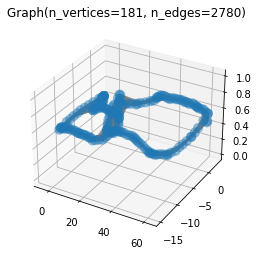

In [98]:
graph_per_dataset = []
for i in range(0, n_datasets):
    G = graphs.Graph(opt_graph_adj[i])
    G.set_coordinates(opt_graph_coords[i][:, 0:3])
    G.compute_fourier_basis()
    graph_per_dataset.append(G)

graph_per_dataset[0].plot()

/home/berlukas/.local/lib/python3.6/site-packages/PyGSP-0.5.1-py3.6.egg/pygsp/plotting.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(<Figure size 432x288 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Graph(n_vertices=181, n_edges=2606)'}>)

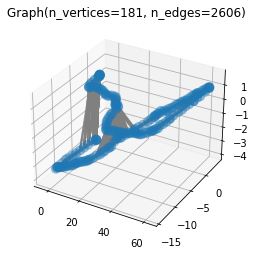

In [99]:
robot_graph_per_dataset = []
for i in range(0, n_datasets):
    G = graphs.Graph(est_graph_adj[i])
    G.set_coordinates(est_graph_coords[i][:, 0:3])
    G.compute_fourier_basis()
    robot_graph_per_dataset.append(G)

robot_graph_per_dataset[0].plot()

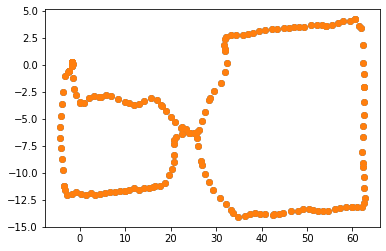

In [77]:
i=0
plt.scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], label='Optimized Trajectory')
plt.scatter(est_graph_coords[i][:,0], est_graph_coords[i][:,1], label='Estimated Trajectory')
plt.show()

In [73]:
est_graph_adj[0]

array(None, dtype=object)